# USE CASE EDA, TOPIK ZULKARNAIN
***

## PART 1

### Load Data

In [30]:
import pandas as pd
data1 = pd.read_csv ('automobile-losses.csv')
data2 = pd.read_csv ('automobile-risk.csv')
data3 = pd.read_csv ('automobile-spec.csv')

In [31]:
data1.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [32]:
data2.head()

,ID,symboling
0,1,3
1,2,3
2,3,1
3,4,2
4,5,2


In [33]:
data3.head()

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### 1. Join 3 tables using ID key
menggabung 3 data dengan menggunakan fungsi pd.merge 

In [34]:
mergedata = pd.merge(data1, data2, how = 'outer', on = 'ID')

In [35]:
alljoin = pd.merge(mergedata,data3, how = 'outer', on = 'ID')

In [36]:
alljoin.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 2. Quick Look
menampilkan info dari data dengan menggunakan .info(), pada hasil dibawah dapat dilihat bahwa data memiliki 27 feature (termasuk ID), beserta type dari datanya beberapa diantaranya adalah integer, float, dan object.

In [37]:
alljoin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-nu

Menggunakan .describe untuk menampilkan summary statistic pada data yang telah dijoin kan sehingga dapat melihat statistika deskriptif pada data berupa jumlah data, mean, standar deviasi, quartil data, dll pada seluruh 27 feature dalam data.

In [38]:
alljoin.describe()

,ID,normalized-losses,symboling,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### No. 3 Identifying Missing Value, and solutions to handle it
Terdapat missing value pada kolom normalized looses, num-doors, bore, stroke, horsepower, peak-rpm, dan price. Data yang hilang akan diatasi dengan menggunakan fungsi mean() , mode(), ataupun median() . Untuk feature yang merupakan numerik seperti normalized-losses, stroke , bore , horsepower, dan price akan digunakan mean() untuk mengisi missing values, namun untuk feature kategorik akan digunakan mode().

In [39]:
alljoin.isnull().sum()

ID                    0
normalized-losses    41
symboling             0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [40]:
numerical = ['price','peak-rpm','stroke','bore','horsepower','normalized-losses']
categorical = ['num-of-doors']

In [41]:
normalized_losses_mean = alljoin['normalized-losses'].mean()

In [42]:
for x in range(6) :
    alljoin[numerical[x]] = alljoin[numerical[x]].fillna(alljoin[numerical[x]].mean())

In [15]:
alljoin.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [16]:
alljoin['num-of-doors'] = alljoin['num-of-doors'].fillna(alljoin['num-of-doors'].mode())
alljoin.isnull().sum()

ID                   0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         1
body-style           0
drive-wheel          0
engine-loc           0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
cylinder             0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### 4. Visualization Data

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
alljoin.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,122.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### Bar Plot jumlah merk mobil terbanyak
Menggunakan count plot untuk mengetahui perbandingan jumlah anatara merk mobile pada data. Dapat dilihat bahwa merk mobil paling sedikiti yaitu mercury dan yang paling banyak adalah toyota .

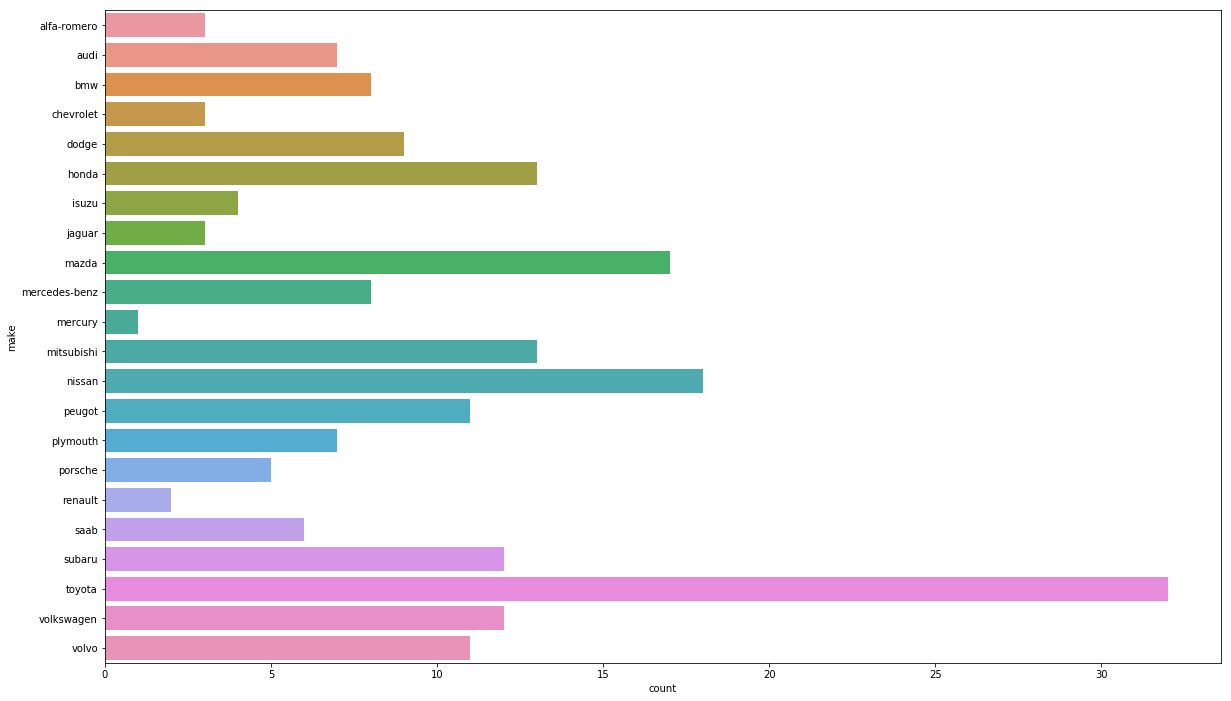

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,12))
datamerk = sns.countplot(y = alljoin["make"])

### Pie Chart untuk menunjukkan persentase tipe mobil berdasarkan jumlah pintu nya
Menggunakan pie chart untuk menampilkan data persentase dari beberapa komposisi pada feature. 

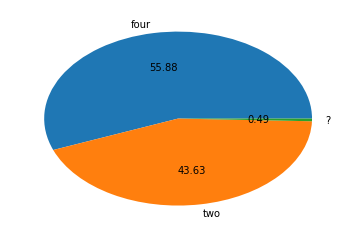

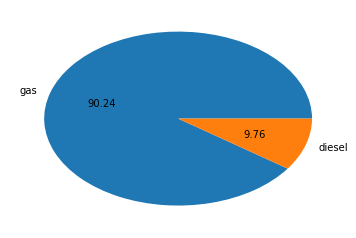

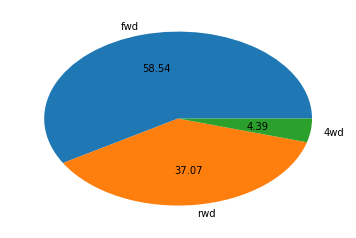

In [20]:
labels = pd.DataFrame(alljoin['num-of-doors'].value_counts())
plt.pie(alljoin['num-of-doors'].value_counts(), labels = labels.index, autopct='%.2f')
plt.show()
labels = pd.DataFrame(alljoin['fuel-type'].value_counts())
plt.pie(alljoin['fuel-type'].value_counts(), labels = labels.index, autopct='%.2f')
plt.show()
labels = pd.DataFrame(alljoin['drive-wheel'].value_counts())
plt.pie(alljoin['drive-wheel'].value_counts(), labels = labels.index, autopct='%.2f')
plt.show()


### Box Plot dan violin plot pada parts mobil

Menggunakan box plot dan violin plot untuk mengetahui informasi dari distribusi data parts mobil yang terdiri dati bore dan stroke. Didapatkan hasil informasi distribusi antara bore dan stroke.


In [21]:
import numpy as np
parts = alljoin[['bore', 'stroke']]
parts_array = np.array(parts)

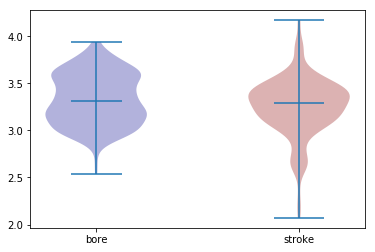

In [22]:
colors = ['darkblue', 'darkred']
vp = plt.violinplot(parts_array,
                    showmedians=True)

plt.xticks([1, 2], ['bore', 'stroke'])

for i in range(len(vp['bodies'])):
    vp['bodies'][i].set(facecolor=colors[i])

plt.show()    

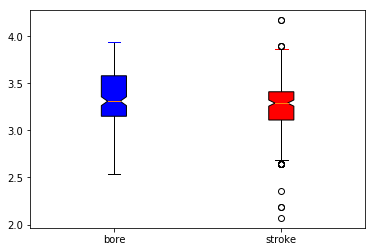

In [23]:
colors = ['blue', 'red']

bp = plt.boxplot(parts_array, 
                 patch_artist=True,
                 notch=True)

for i in range(len(bp['boxes'])):
    
    bp['boxes'][i].set(facecolor=colors[i])
    
    bp['caps'][2*i + 1].set(color=colors[i])
    
plt.xticks([1, 2], ['bore', 'stroke'])

plt.show()

### Scatter Plot Price
Menggunakan scatter plot untuk melihat hubungan antara dua data, pada kasus ini akan dilihat apakah terdapat hubungan antara data mengenai total massa mobil terhadap horsepower. Terlihat pada plot dibawah yaitu bahwa terdapat hubungan yang positif antara berat mobil terhadap horsepower, sehingga dapat di interpretasikan semakin berat kendaraan maka horsepowernya akan semakin tinggi dengan ke akuratan hubungan sebesar 76%. Adapun hubungan horse power dengan price juga menunjukkan trend positif dengan ke akuratan hubungan sebesar 75%

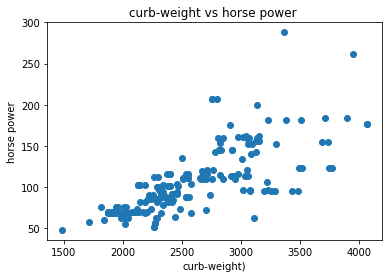

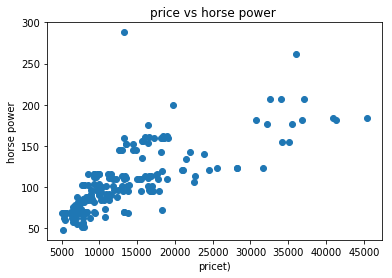

In [24]:
plt.scatter(alljoin['curb-weight'],alljoin['horsepower'])
plt.title('curb-weight vs horse power ')
plt.xlabel('curb-weight)')
plt.ylabel('horse power')
plt.show()

plt.scatter(alljoin['price'],alljoin['horsepower'])
plt.title('price vs horse power ')
plt.xlabel('pricet)')
plt.ylabel('horse power')
plt.show()


In [29]:
alljoin[['price','horsepower']].corr(method = 'pearson').style.background_gradient().set_precision(2)

,price,horsepower
price,1,0.76
horsepower,0.76,1


In [26]:
alljoin[['curb-weight','horsepower']].corr(method = 'pearson').style.background_gradient().set_precision(2)

,curb-weight,horsepower
curb-weight,1,0.75
horsepower,0.75,1


## Part 2

### 1. Car brand with highest price
Berdasarkan visualisasi dari bar-chart data harga dan merk mobil, dapat dilihat bahwa mobil dengan merk termahal dimiliki oleh mercedes benz

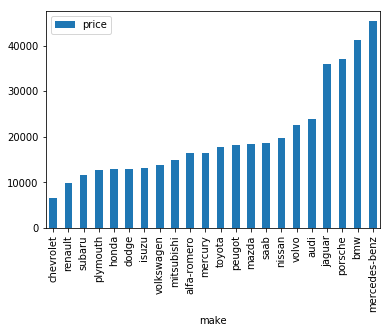

In [27]:
price_car = alljoin[["make", "price"]]
price_car_bar = price_car.groupby("make").max().sort_values("price").plot(kind='bar')

### 2. Maximum horsepower for car with 6 cylinder engine
Berdasarkan visualisasi dari bar data horsepower dan cyliner engini, dapat dilihat bahwa maksimum horsepower pada mobil dengan 6 cylinder engine adalah sebesar 207

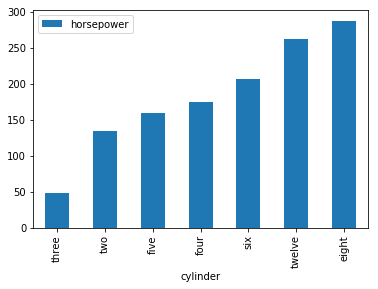

In [28]:
horsepower_car = alljoin[["cylinder", "horsepower"]]
horsepower_car_bar = horsepower_car.groupby("cylinder").max().sort_values("horsepower").plot(kind='bar')

### 3. Average peak-rpm for 'turbo' style aspiration car

In [30]:
aspiration_peak = alljoin [["peak-rpm","aspiration"]]
aspiration_peak_turbo = aspiration_peak[aspiration_peak['aspiration']=='turbo']
print('Average peak-rpm for turbo style aspriation car is %f'%(aspiration_peak_turbo.mean()))

Average peak-rpm for turbo style aspriation car is 4939.189189


### 4. Average of price based on body style

In [130]:
bodystyle_price = alljoin [["body-style","price"]]
average_bodystyle_price = bodystyle_price.groupby('body-style').mean()
average_bodystyle_price 

,price
body-style,
convertible,21890.500000
hardtop,22208.500000
hatchback,10050.289410
sedan,14433.658945
wagon,12371.960000


### 5. Average of price based on body-style only for honda

In [26]:
bodystyle_price2 = alljoin[["body-style","price","make"]]
bodystyle_price_honda = bodystyle_price2[bodystyle_price2['make']== 'honda']
print('Average of price based on body-style for honda is %f' % (bodystyle_price_honda.mean()))



Average of price based on body-style for honda is 8184.692308


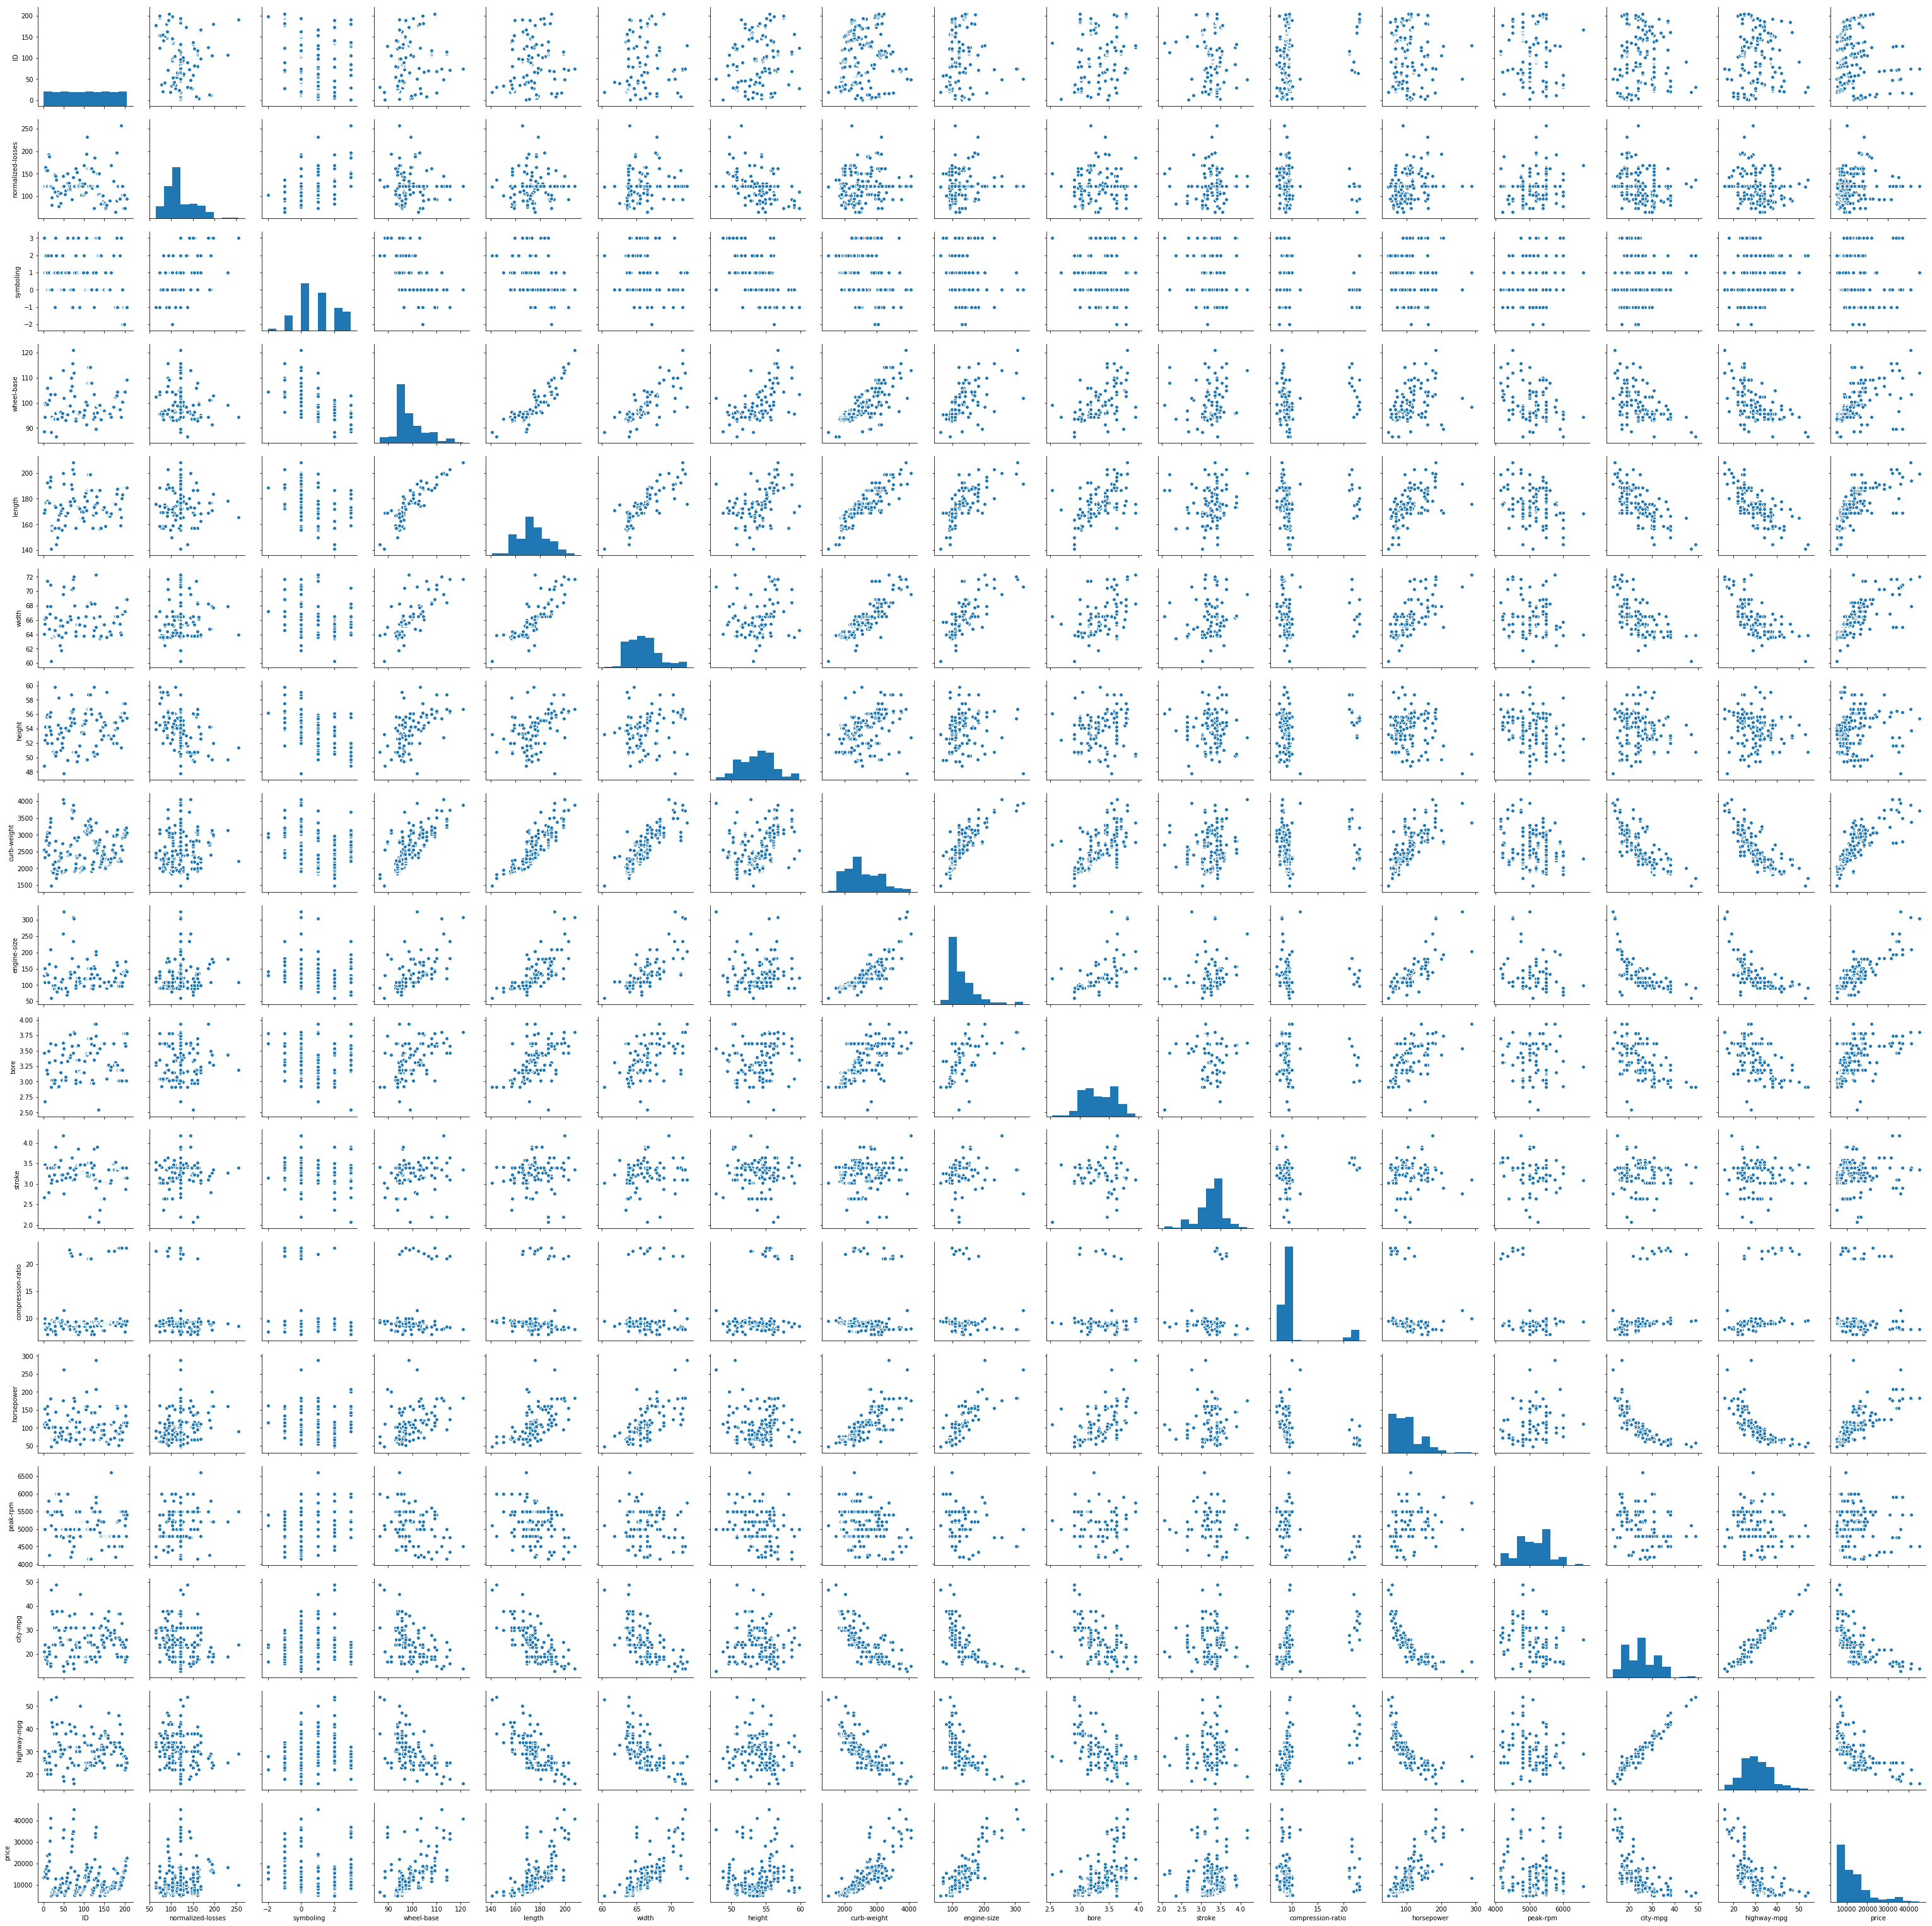

In [43]:
import seaborn as sns
sns.pairplot(alljoin)
